The following cell computes:

(a) declare the parameters of the problem

(b) define your grid

(c) set up arrays to store value functions and consumption

(d) write a loop for the value function iteration backwards from stage  𝑇 ; finding the optimal value and consumption at every stage and every grid point.

In [64]:
import numpy as np

def util(c):
    return (c**(1-(1/siggma)))/(1-(1/siggma))

# Main value function iteration loop
def VFI(T, betta, siggma, R, a_grid):
    ## Value function and Consumption function storage
    VV = np.zeros((T,len(a_grid))) ## at each time period, consider all possible a's.
    VV[T-1,:] = (a_grid**(1-(1/siggma)))/(1-(1/siggma)) # value function in the last period, consume all
    CC = np.zeros((T,len(a_grid)))
    CC[T-1,:] = a_grid # policy in last period, consume all
    for tt in range(T-1,-1,-1): # last argument is stepsize -1
        i = 0 #update in a
        for a in a_grid:
            j = 0 # update in a_p
            V_a_p_choices = np.zeros(len(a_grid))
            c_choices = np.zeros(len(a_grid))
            for a_p in a_grid:
                c_choices[j] = a - (a_p/R)
                if a-(1/R)*a_p < 0: #c < 0
                    V_a_p_choices[j] = -1e7
                else:
                    V_a_p_choices[j] = util(a-(a_p/R)) + betta*VV[tt,j]

                j = j + 1   
            VV[tt-1,i] = np.max(V_a_p_choices)
            CC[tt-1,i] = c_choices[np.argmax(V_a_p_choices)]
            i = i+1
    return VV, CC


siggma = 0.5
betta = 0.9
R = 1/betta
T = 10

grid_min = 0.01
grid_max = 20
grid_size = 200
a_grid = np.linspace(grid_min,grid_max,num=grid_size) # grid of

VV, CC = VFI(T, betta, siggma, R, a_grid) 


(d) write a loop for the value function iteration backwards from stage $T$;
finding the optimal value and consumption at every stage and every
grid point. 

Let's now do on a coarse grid and short horizon.

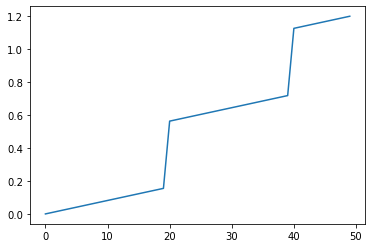

In [65]:
siggma = 0.5
betta = 0.98
R = 1/betta
T = 20

grid_min = 0.01
grid_max = 20
grid_size = 50
a_grid = np.linspace(grid_min,grid_max,num=grid_size) # grid of a

VV, CC = VFI(T, betta, siggma, R, a_grid) 

import matplotlib.pyplot as plt
plt.plot(CC[0,:])

QUESTION 2. Compute the problem for $T = 80$, $\beta = .98$, $R = 1/\beta$ and $\sigma = .5$

In [66]:
siggma = 0.5
betta = 0.98
R = 1/betta
T = 80

grid_min = 0.01
grid_max = 30
grid_size = 500
a_grid = np.linspace(grid_min,grid_max,num=grid_size) # grid of a

VV, CC = VFI(T, betta, siggma, R, a_grid) 

(-400.0, 100.0)

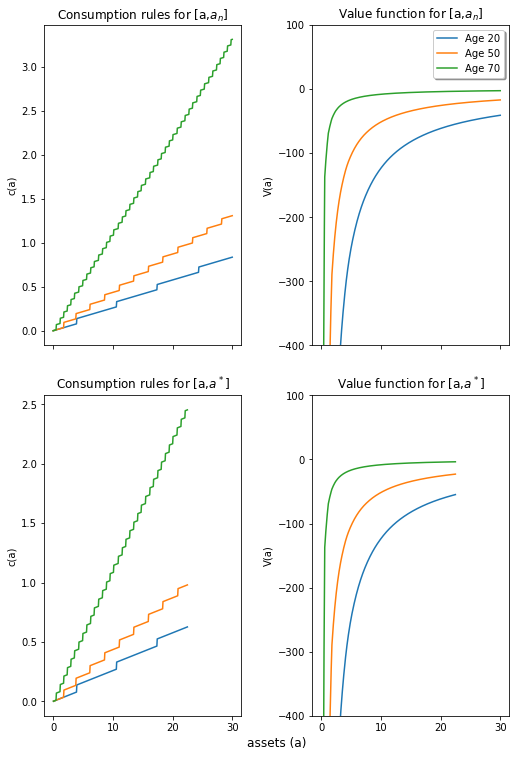

In [67]:
# Define an a*
a_prop = 0.75
a_star_ind = round(a_prop * grid_size)
a_star = a_grid[a_star_ind]

# Make Plots for "age 20", i.e. t = 20
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (8,11), sharex = True)
fig.tight_layout(pad = 4.0)
fig.add_subplot(111, frameon = False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False,
right=False)
plt.xlabel("assets (a)", fontsize = 12)

axs[0,0].plot(a_grid, CC[20,:], label = "Age 20")
axs[0,0].plot(a_grid, CC[50,:], label = "Age 50")
axs[0,0].plot(a_grid, CC[70,:], label = "Age 70")
axs[0,0].set_ylabel('c(a)')
axs[0,0].set_title('Consumption rules for [a,$a_n$]')
axs[0,1].plot(a_grid, VV[20,:], label = 'Age 20')
axs[0,1].plot(a_grid, VV[50,:], label = 'Age 50')
axs[0,1].plot(a_grid, VV[70,:], label = 'Age 70')
axs[0,1].set_ylabel('V(a)')
axs[0,1].set_title('Value function for [a,$a_n$]')
axs[0,1].set_ylim([-400, 100])
axs[0,1].legend(shadow = True, fancybox = True)

axs[1,0].plot(a_grid[1:a_star_ind], CC[20,1:a_star_ind], label = "Age 20")
axs[1,0].plot(a_grid[1:a_star_ind], CC[50,1:a_star_ind], label = "Age 50")
axs[1,0].plot(a_grid[1:a_star_ind], CC[70,1:a_star_ind], label = "Age 70")
axs[1,0].set_ylabel('c(a)')
axs[1,0].set_title('Consumption rules for [a,$a^*$]')
axs[1,1].plot(a_grid[1:a_star_ind], VV[20,1:a_star_ind], label = "Age 20")
axs[1,1].plot(a_grid[1:a_star_ind], VV[50,1:a_star_ind], label = "Age 50")
axs[1,1].plot(a_grid[1:a_star_ind], VV[70,1:a_star_ind], label = "Age 70")
axs[1,1].set_ylabel('V(a)')
axs[1,1].set_title('Value function for [a,$a^*$]')
axs[1,1].set_ylim([-400, 100])

Note a few things here:
1. The finer grid will make the consumption rules converge to linear, i.e the true rule is linear if wealth is not a discrete choice

2. Consumption is increasing in wealth, and is PERFECTLY smoothed given $\beta R = 1$

3. Shortening the grid does not change results

4. Value functions are monotonic in age. (ie for all $x,\:$ we have  $f_1(x) > f_2(x)$)


QUESTION 3) We now add 

$$ c_t + R^{-1}b_t = b_{t-1} + y_t $$
where $b_{-1} = 0$ and 
$$ y_t = -3 + 0.25(t+20) - 0.0025(t+20)^2 $$
for $T = 45$.

Initial lifetime wealth is given by

$$a_0 = \sum_{t=0}^{44} R^{-t}y_t = \sum_{t=0}^{44} R^{-t}(-3 + 0.25(t+20) - 0.0025(t+20)^2) = 75.31$$

In [68]:
T = 45
yt = np.zeros(T+20)
for t in range(0,45):
    yt[t] = -3 + 0.25*(t+20)-0.0025*(t+20)**2

a_0 = 0
for t in range(0,T):
    a_0 = a_0 + (R**(-t)) * yt[t]
print(a_0)

75.31215949729875


In [165]:
grid_min = 0.01
grid_max = 100
grid_size = 1000
a_grid = np.linspace(grid_min,grid_max,num=grid_size) # grid of a

T = 65

VV, CC = VFI(T, betta, siggma, R, a_grid)


def optimal_path(a_0, a_grid, CC, R,T):
    a_p_opt   = np.zeros(T)
    c_opt     = np.zeros(T)
    a_p_index = np.zeros(T)
    b_opt     = np.zeros(T)
    
    a_p_opt[0] = a_0
    a_p_index[0] = np.argmin((abs(a_grid - a_0)))
#    print(CC[0,:])
#    print(a_p_index[0])
#    print((CC[0,152]))
#    print((CC[0,a_p_index[0].astype(int)]))
    c_opt[0] = CC[0, a_p_index[0].astype(int)]
    b_opt[0] = 0
    
    
    for t in range(1,T):
        a_p_opt[t] = R*(a_p_opt[t-1]-c_opt[t-1])  ## a' = R(a-c)
        a_p_index[t] = np.argmin((abs(a_grid - a_p_opt[t])))
        c_opt[t] = CC[t,a_p_index[t].astype(int)]
        b_opt[t] = R*(b_opt[t-1] +yt[t] - c_opt[t])
        
    return a_p_opt, a_p_index, c_opt, b_opt


a_p_opt, a_p_index, c_opt, b_opt = optimal_path(a_0, a_grid, CC, R,T) 
    

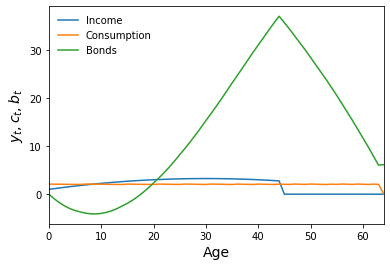

In [166]:
#plot income, consumption, and bonds vs age
age = range(0,T)
fig, ax = plt.subplots()
ax.plot(age, yt, label = 'Income')
ax.plot(age, c_opt, label='Consumption')
ax.plot(age, b_opt, label= 'Bonds')
ax.set_xlabel('Age', fontsize = 14)
ax.set_ylabel('$y_{t}, c_{t}, b_{t}$', fontsize = 14)
ax.set_xlim((min(age), max(age)))
ax.legend(frameon=False)


Now we add the borrowing constraint $b_t \geq 0$ and $a_t \geq \sum_{t=0}^{T-t}R^{-\tau}y_{t+\tau}$. I construct this set of bounds by the object 'constraint' in the code.

In [167]:
grid_min = 0.01
grid_max = 100
grid_size = 500
a_grid = np.linspace(grid_min,grid_max,num=grid_size) # grid of a

def VFI_constrained(T, betta, siggma, R, a_grid):
    ## Value function and Consumption function storage
    VV = np.zeros((T,len(a_grid))) ## at each time period, consider all possible a's.
    VV[T-1,:] = (a_grid**(1-(1/siggma)))/(1-(1/siggma)) # value function in the last period, consume all
    CC = np.zeros((T,len(a_grid)))
    CC[T-1,:] = a_grid # policy in last period, consume all
    BB = np.zeros((T,len(a_grid)))
    
    constraint = np.zeros(T)
    for t in range(0,T):
        constraint[0] = constraint[0] + (R**(-t))*yt[t]
    for t in range(1,T):
        constraint[t] = R*((constraint[t-1])-yt[t-1])
                                         
    for tt in range(T-1,-1,-1): # last argument is stepsize -1
        i = 0 #update in a
        for a in a_grid:
            j = 0 # update in a_p
            V_a_p_choices = np.zeros(len(a_grid))
            c_choices = np.zeros(len(a_grid))
            for a_p in a_grid:
                c_choices[j] = a - (a_p/R)
                if a-(1/R)*a_p < 0: #c < 0
                    V_a_p_choices[j] = -1e7
                elif a_p < constraint[tt]:
                    V_a_p_choices[j] = -1e7
                else:
                    V_a_p_choices[j] = util(a-(a_p/R)) + betta*VV[tt,j]

                j = j + 1   
            VV[tt-1,i] = np.max(V_a_p_choices)
            CC[tt-1,i] = c_choices[np.argmax(V_a_p_choices)]
            i = i+1
            
    return VV, CC



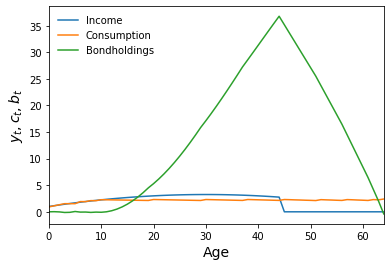

In [168]:
VV, CC = VFI_constrained(T, betta, siggma, R, a_grid)
a_p_opt, a_p_index, c_opt, b_opt = optimal_path(a_0, a_grid, CC, R,T) 

age = range(0,T)
fig, ax = plt.subplots()
ax.plot(age, yt, label = 'Income')
ax.plot(age, c_opt, label='Consumption')
ax.plot(age, b_opt, label= 'Bondholdings')
ax.set_xlabel('Age', fontsize = 14)
ax.set_ylabel('$y_{t}, c_{t}, b_{t}$', fontsize = 14)
ax.set_xlim((min(age), max(age)))
ax.legend(frameon=False)


Quickly check the constraint for sanity:

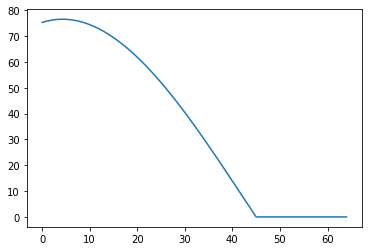

In [123]:
plt.plot(range(0,T),constraint)

We now solve $$ V(a) = \max _{a'} \frac{(a-R^{-1}a')^{1-1/\sigma}}{1-1/\sigma} + V(a')$$

We are going to test a time horizon of $T = 200$

Now let's check that everything looks that same for $T=300$ and $T = 400$

In [396]:
grid_min = 0.01
grid_max = 100
grid_size = 500
a_grid = np.linspace(grid_min,grid_max,num=grid_size) # grid of a
T = 300
yt = 0.1*np.zeros(T)

VV, CC = VFI(T, betta, siggma, R, a_grid)



In [397]:
a_0 = 0
for t in range(0,T):
    a_0 = a_0 + (R**(-t)) * yt[t]
    
b_T = R*(a_grid - CC[0,:]) - a_0

# Get Bonds
BB = np.zeros((T,len(a_grid)))
BB[0,:] = R*(0+yt[0]-CC[0,:])        
for t in range(1,T):
    BB[t,:]=R*(BB[t-1,:]+yt[t]-CC[t,:])

Text(0.5, 1.0, 'Bonds on [a,$a_n$]')

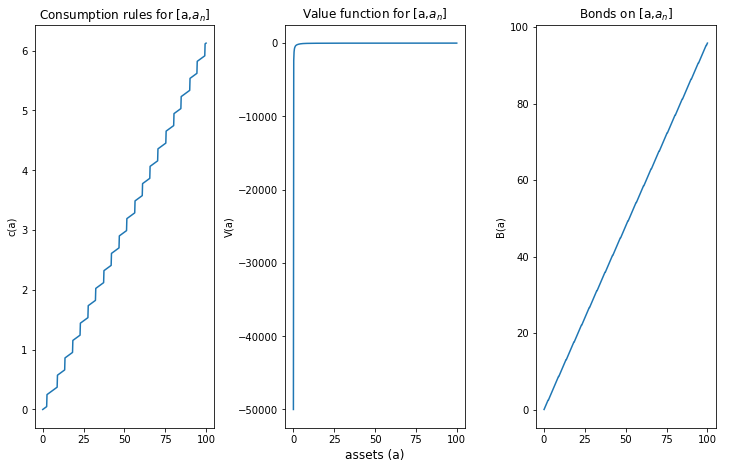

In [398]:
# Make Plots for "age 20", i.e. t = 20
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (11,7), sharex = True)
fig.tight_layout(pad = 4.0)
fig.add_subplot(111, frameon = False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False,
right=False)
plt.xlabel("assets (a)", fontsize = 12)

axs[0].plot(a_grid, CC[0,:])
axs[0].set_ylabel('c(a)')
axs[0].set_title('Consumption rules for [a,$a_n$]')
axs[1].plot(a_grid, VV[0,:])
axs[1].set_ylabel('V(a)')
axs[1].set_title('Value function for [a,$a_n$]')
axs[2].plot(a_grid, b_T)
axs[2].set_ylabel('B(a)')
axs[2].set_title('Bonds on [a,$a_n$]')

Now check the same for $T = 400$

Text(0.5, 1.0, 'Bonds on [a,$a_n$]')

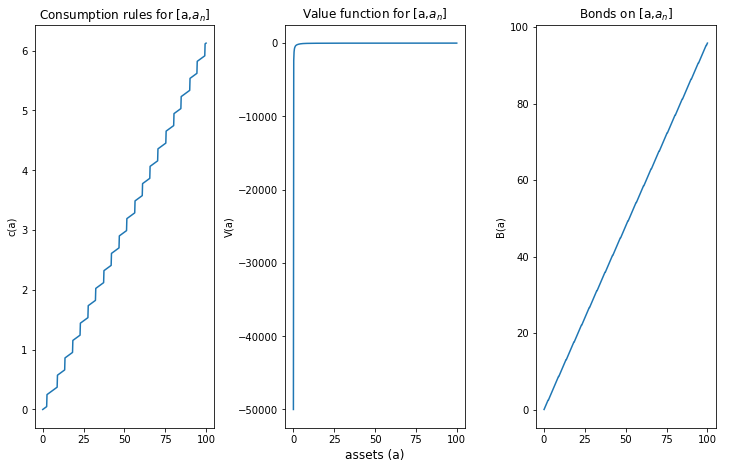

In [395]:
grid_min = 0.01
grid_max = 100
grid_size = 500
a_grid = np.linspace(grid_min,grid_max,num=grid_size) # grid of a
T = 400
yt = 0.1*np.zeros(T)

VV, CC = VFI(T, betta, siggma, R, a_grid)

a_0 = 0
for t in range(0,T):
    a_0 = a_0 + (R**(-t)) * yt[t]
    
b_T = R*(a_grid - CC[0,:]) - a_0

# Get Bonds
BB = np.zeros((T,len(a_grid)))
BB[0,:] = R*(0+yt[0]-CC[0,:])        
for t in range(1,T):
    BB[t,:]=R*(BB[t-1,:]+yt[t]-CC[t,:])
    
# Make Plots for "age 20", i.e. t = 20
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (11,7), sharex = True)
fig.tight_layout(pad = 4.0)
fig.add_subplot(111, frameon = False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False,
right=False)
plt.xlabel("assets (a)", fontsize = 12)

axs[0].plot(a_grid, CC[0,:])
axs[0].set_ylabel('c(a)')
axs[0].set_title('Consumption rules for [a,$a_n$]')
axs[1].plot(a_grid, VV[0,:])
axs[1].set_ylabel('V(a)')
axs[1].set_title('Value function for [a,$a_n$]')
axs[2].plot(a_grid, b_T)
axs[2].set_ylabel('B(a)')
axs[2].set_title('Bonds on [a,$a_n$]')

Note that everything here is approximately the same. We now move to computing the problem with seasonal incomes. i.e in summer periods ($t$ even) we set $y_t = 0.1$ and in winter we set $y_t = 0$. With the borrowing constraint kept for this we should not expect perfect consumption smoothing.

In [248]:
grid_min = 5
grid_max = 100
grid_size = 100
a_grid = np.linspace(grid_min,grid_max,num=grid_size) # grid of a
T = 300
yt = 0.1*np.ones(T)

for t in range(0,np.floor(T/2).astype(int)):
    yt[2*t] = 0


In [399]:
grid_min = 0.1
grid_max = 100
grid_size = 500
a_grid = np.linspace(grid_min,grid_max,num=grid_size) # grid of a
yt = 0.1
betta = 0.98

def VFI_seasonal_infinite(betta, siggma, R, a_grid, season):
    ## Value function and Consumption function storage
    VV_guess  = np.zeros(len(a_grid))
    VV_update = np.zeros(len(a_grid)) ## at each time period, consider all possible a's.
    VV_old    = a_grid
    CC_update = np.zeros(len(a_grid))
    BB = np.zeros((len(a_grid)))
    
    T  = 1000 #large number to approximate infinite sum constraint
    yt = np.zeros(T)
    if season == 1:
        for t in range(0,int(T/2)):
            yt[2*t] = 0.5
    elif season == 0:
        for t in range(0,int((T-1)/2)):
            yt[2*t+1] = 0.5
        
    constraint = 0
    for t in range(0,T):
        constraint = constraint + (R**(-t))*yt[t]
    
    tol = 1e-9
    maxits = 3000
    its = 0
    gap = 10
    
    while its < maxits and gap > tol:
        i = 0 # update in a
        for a in a_grid:
            j = 0 # update in a_p
            V_a_p_choices = np.zeros(len(a_grid))
            c_choices = np.zeros(len(a_grid))
            for a_p in a_grid:
                c_choices[j] = a - (a_p/R)
                if a-(1/R)*a_p < 0: #c < 0
                    V_a_p_choices[j] = -1e07
                elif a_p < constraint:
                    V_a_p_choices[j] = -1e07
                else:
                    V_a_p_choices[j] = util(a-(a_p/R)) + betta*VV_old[j]

                j = j + 1
            VV_update[i] = np.max(V_a_p_choices) 
            CC_update[i] = c_choices[np.argmax(V_a_p_choices)]
            i = i + 1
        
        gap = np.linalg.norm((VV_update - VV_old))  
        VV_old = np.copy(VV_update)
        its = its+1
    return VV_update, CC_update


In [ ]:
VV_patient, CC_patient = VFI_seasonal_infinite(betta, siggma, R, a_grid, 0)
beta_impatient = 0.9
VV_patient, CC_impatient = VFI_seasonal_infinite(betta_impatient, siggma, R, a_grid, 0)
# b_T = R*(a_grid - CC) - constraint

# # Get Bonds
b_n = 10
grid_size = 500
a_grid = np.linspace(0.01, b_n, num=grid_size) # borrowing constraint imposed here

# Solve for patient farmer
beta_patient = 0.98
R = 1 / 0.98
sigma = 0.5
value_grid_patient, cons_grid_patient = VFI_seasonal_infinite(betta, siggma, R, a_grid, 0)
bonds_w_patient = R * (a_grid - CC_patient)
bonds_s_patient = R * (a_grid + yt - CC_patient)
# Solve for impatient farmer
betta_impatient = 0.9
value_grid_impatient, cons_grid_impatient = VFI_seasonal_infinite(betta_impatient, siggma, R, a_grid, 0)
bonds_w_impatient = R * (a_grid - CC_impatient)
bonds_s_impatient = R * (a_grid + yt - CC_impatient)

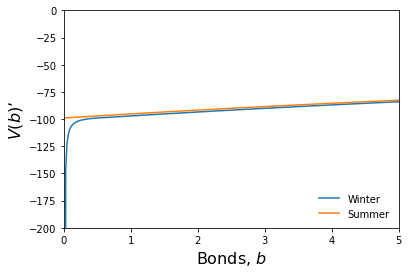

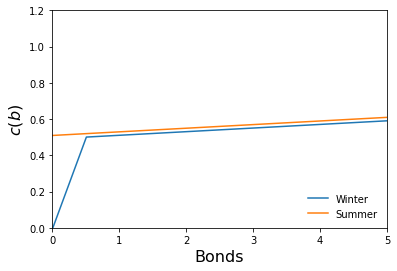

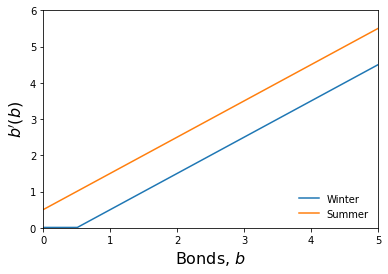

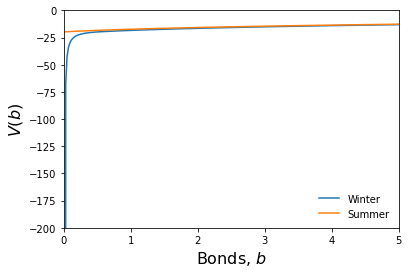

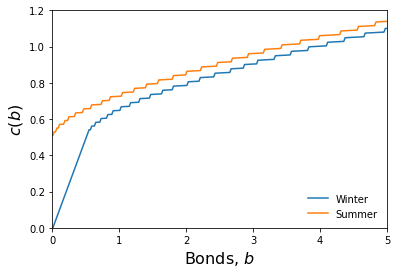

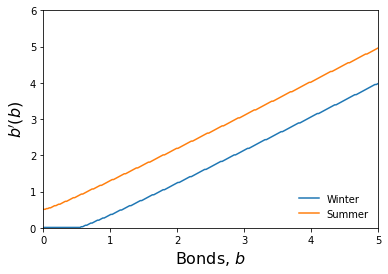

In [389]:
#Plots
fig, ax = plt.subplots()
ax.plot(a_grid, VV_patient)
ax.set_xlabel(r'Bonds, $b$', fontsize = 16)
ax.set_ylabel(r'$V(b)$', fontsize = 16)
ax.legend(['Winter', 'Summer'], frameon=False, loc='lower right')
ax.set_xlim(0, 5)
ax.set_ylim(-200, 0)
plt.show()
fig, ax = plt.subplots()
ax.plot(a_grid, CC)
ax.set_xlabel(r'Bonds', fontsize = 16)
ax.set_ylabel(r'$c(b)$', fontsize = 16)
ax.legend(['Winter', 'Summer'], frameon=False, loc='lower right')
ax.set_xlim(0, 5)
ax.set_ylim(0, 1.2)
plt.show()
fig, ax = plt.subplots()
ax.plot(a_grid, b_w_patient, label='Winter')
ax.plot(a_grid, b_s_patient, label='Summer')
ax.set_xlabel(r'Bonds, $b$', fontsize = 16)
ax.set_ylabel('$b{\'}(b)$', fontsize = 16)
ax.set_xlim(0, 5)
ax.set_ylim(0, 6)
6
ax.legend(frameon=False, loc='lower right')
plt.show()
# Plots
fig, ax = plt.subplots()
ax.plot(a_grid, VV_impatient)
ax.set_xlabel(r'Bonds, $b$', fontsize = 16)
ax.set_ylabel(r'$V(b)$', fontsize = 16)
ax.legend(['Winter', 'Summer'], frameon=False, loc='lower right')
ax.set_xlim(0, 5)
ax.set_ylim(-200, 0)
plt.show()
fig, ax = plt.subplots()
ax.plot(a_grid, CC_impatient)
ax.set_xlabel(r'Bonds, $b$', fontsize = 16)
ax.set_ylabel(r'$c(b)$', fontsize = 16)
ax.legend(['Winter', 'Summer'], frameon=False, loc='lower right')
ax.set_xlim(0, 5)
ax.set_ylim(0, 1.2)
plt.show()
fig, ax = plt.subplots()
ax.plot(a_grid, b_w_impatient, label='Winter')
ax.plot(a_grid, b_s_impatient, label='Summer')
ax.set_xlabel(r'Bonds, $b$', fontsize = 16)
ax.set_ylabel('$b{\'}(b)$', fontsize = 16)
ax.set_xlim(0, 5)
ax.set_ylim(0, 6)
ax.legend(frameon=False, loc='lower right')
plt.show()

Note that the second set of plots (which corresponds to the impatient agent) features less consumption smoothing, but in neither case is there perfect consumption smoothing for low levels of bond holdings. Both farmers still save a little in summer to smooth somewhat over winter.